## 1-Loyihani sozlamalari (Setup)

Avval kerakli kutubxonalarni yuklab olamiz va loyiha papkasini (`project_root`) tizimga tanitamiz, shunda `src` papkasidagi kodlarimizni ishlatishimiz mumkin bo'ladi.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Loyiha asosiy papkasini (Project Root) aniqlash
# Notebooklar odatda 'notebooks/' papkasida turadi, shuning uchun bir pog'ona yuqoriga chiqamiz
project_root = os.path.abspath(os.path.join(os.getcwd(), '../'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Biz yaratgan NLP quvurini (pipeline) import qilamiz
from src.uznlp.preprocessing.pipeline import TextPreprocessor

# Vizualizatsiya sozlamalari
sns.set(style="whitegrid")
pd.set_option('display.max_colwidth', 100)

print("Muhit tayyorlandi.")
print(f"Loyiha manzili: {project_root}")

Muhit tayyorlandi.
Loyiha manzili: c:\Users\Surface PC\OneDrive\Рабочий стол\uznlp_course


## 2-Ma'lumotlarni yuklash

Xom ma'lumotlarni va "stop-word"lar ro'yxatini yuklab olamiz.

In [3]:
raw_path = os.path.join(project_root, 'data/raw/uzbek_news.csv')
stopwords_path = os.path.join(project_root, 'data/stopwords.txt')

# Ma'lumotlarni o'qish
df = pd.read_csv(raw_path)

# Stop-word'larni o'qish
if os.path.exists(stopwords_path):
    with open(stopwords_path, 'r', encoding='utf-8') as f:
        stopwords = [line.strip() for line in f]
else:
    stopwords = []
    print("Ogohlantirish: Stop-words fayli topilmadi.")

print(f"Xom ma'lumotlar: {df.shape[0]} ta maqola yuklandi.")
print(f"Stop-words: {len(stopwords)} ta so'z yuklandi.")

# Dastlabki 3 ta qatorni ko'rish
df[['category', 'title', 'body']].head(3)

Xom ma'lumotlar: 39 ta maqola yuklandi.
Stop-words: 48 ta so'z yuklandi.


,category,title,body
0,education,Kasbiy ta’lim tashkilotlarini akkreditatsiya qilishda baholash indikatorlari tasdiqlandi,"Hujjatga muvofiq, kasbiy ta’lim tashkilotlarini kompleks davlat akkreditatsiyasidan o‘tkazish ja..."
1,education,Akkreditatsiya to‘lovlari qaytarilmaydi: ta’lim tashkilotlari uchun yangi qoidalar,"Hujjatga muvofiq , mazkur nizom o‘rta maxsus, kasbiy, oliy va oliy ta’limdan keyingi ta’lim, shu..."
2,education,“Kun.uz’da chiqqan video sabab orzumga erishdim” – Harvard grantini yutgan qiz,"Dilafruz Sobirova Farg‘ona shahridagi Prezident maktabining 11-sinf o‘quvchisi. IELTS’dan 8, SAT..."


## 3-Preprocessing Pipeline (Ishlov berish)

Biz yaratgan TextPreprocessor klassini ishga tushiramiz. Bu jarayon bir vaqtning o'zida quyidagi ishlarni bajaradi:
- Normalizatsiya: HTML teglarni tozalash, apostroflarni to'g'irlash.
- Filtrlash: Stop-word'larni olib tashlash.
- Stemming: So'zlarni o'zagi (root)gacha qisqartirish (masalan: maktablarimizda --> maktab).

In [4]:
# Pipelineni ishga tushirish
processor = TextPreprocessor(stopwords=stopwords)

print("Matnlar tozalanmoqda va o'zagiga ajratilmoqda (Stemming)...")

# 'fillna' bo'sh kataklarni to'ldiradi, keyin 'process' funksiyasi qo'llaniladi
df['clean_text'] = df['body'].fillna("").apply(processor.process)

print("Jarayon yakunlandi.")
df[['body', 'clean_text']].head(3)

Matnlar tozalanmoqda va o'zagiga ajratilmoqda (Stemming)...
Jarayon yakunlandi.


,body,clean_text
0,"Hujjatga muvofiq, kasbiy ta’lim tashkilotlarini kompleks davlat akkreditatsiyasidan o‘tkazish ja...",hujjat muvofiq kasbiy ta’l tashkilot kompleks davlat akkreditatsiya o‘tkaz jarayon 7 ta yo‘nalis...
1,"Hujjatga muvofiq , mazkur nizom o‘rta maxsus, kasbiy, oliy va oliy ta’limdan keyingi ta’lim, shu...",hujjat muvofiq mazkur nizom o‘rta maxsus kasbiy oliy oliy ta’l keying ta’l shuningdek kadr qay t...
2,"Dilafruz Sobirova Farg‘ona shahridagi Prezident maktabining 11-sinf o‘quvchisi. IELTS’dan 8, SAT...",dilafruz sobirova farg‘ona shahar prezident maktab 11 sinf o‘quvchi ielts’ 8 sat imtihon 1540 ba...


## 4-O'zgarishlarni vizual solishtirish

Matn qanday o'zgarganini aniq ko'rish uchun bitta maqolani misol qilib olamiz.

In [5]:
# Birinchi maqolani tanlaymiz
sample_idx = 0
original = df.iloc[sample_idx]['body']
cleaned = df.iloc[sample_idx]['clean_text']

print("--- ASL MATN (ORIGINAL) ---")
print(original[:200] + "...")
print("\n--- TOZALANGAN VA STEMMING QILINGAN ---")
print(cleaned[:200] + "...")

--- ASL MATN (ORIGINAL) ---
Hujjatga muvofiq, kasbiy ta’lim tashkilotlarini kompleks davlat akkreditatsiyasidan o‘tkazish jarayonida 7 ta yo‘nalish doirasida 37 ta mezon bo‘yicha jami 203 ta indikator qo‘llanadi . Shundan: 12 ta...

--- TOZALANGAN VA STEMMING QILINGAN ---
hujjat muvofiq kasbiy ta’l tashkilot kompleks davlat akkreditatsiya o‘tkaz jarayon 7 ta yo‘nalish doira 37 ta mezon bo‘yicha jam 203 ta indikator qo‘lla shun 12 ta 5 9 foiz majburiy indikator 191 ta 9...


Natijada HTML kodlar yo'qolgani va so'zlar qisqarganini (masalan, qo'shimchalar olib tashlanganini) ko'rishingiz mumkin.

## 5-Eng ko'p uchraydigan so'zlar (Bag-of-Words)

Endi matnni matematik vektorlarga aylantiramiz va eng ko'p ishlatilgan so'zlarni grafikda ko'ramiz.

C:\Users\Surface PC\AppData\Local\Temp\ipykernel_1112\996235914.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(top_words), palette='viridis')


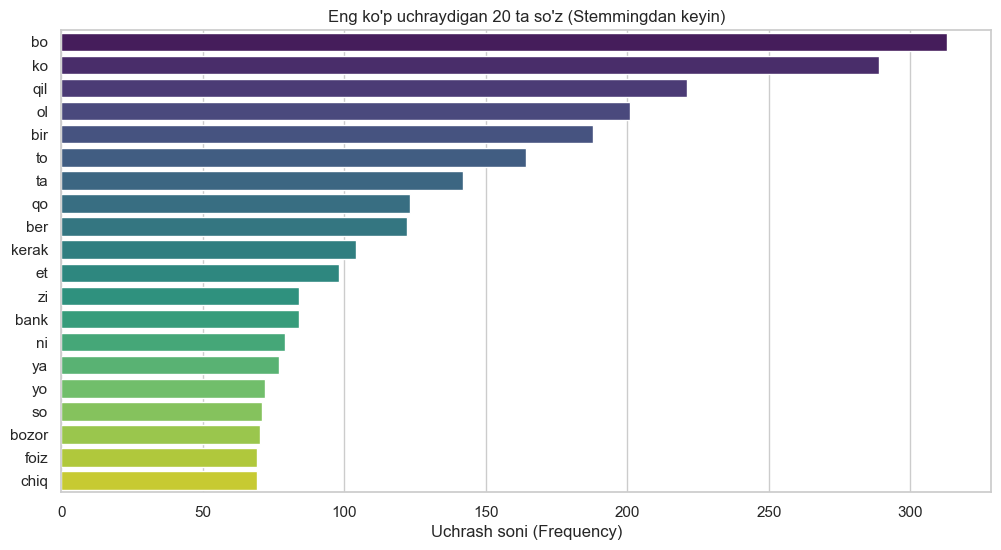

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Vizualizatsiya uchun oddiy vektorizator (Top 20 so'z)
vec = CountVectorizer(max_features=20)
X = vec.fit_transform(df['clean_text'])

# So'zlar sonini hisoblash
sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Grafik chizish
plt.figure(figsize=(12, 6))
top_words, counts = zip(*words_freq)
sns.barplot(x=list(counts), y=list(top_words), palette='viridis')
plt.title("Eng ko'p uchraydigan 20 ta so'z (Stemmingdan keyin)")
plt.xlabel("Uchrash soni (Frequency)")
plt.show()

## 6-TF-IDF Heatmap (Muhimlik darajasi)

So'zlarning shunchaki sonini emas, balki ularning muhimlik darajasini (TF-IDF) ko'rish uchun "Heatmap" chizamiz.

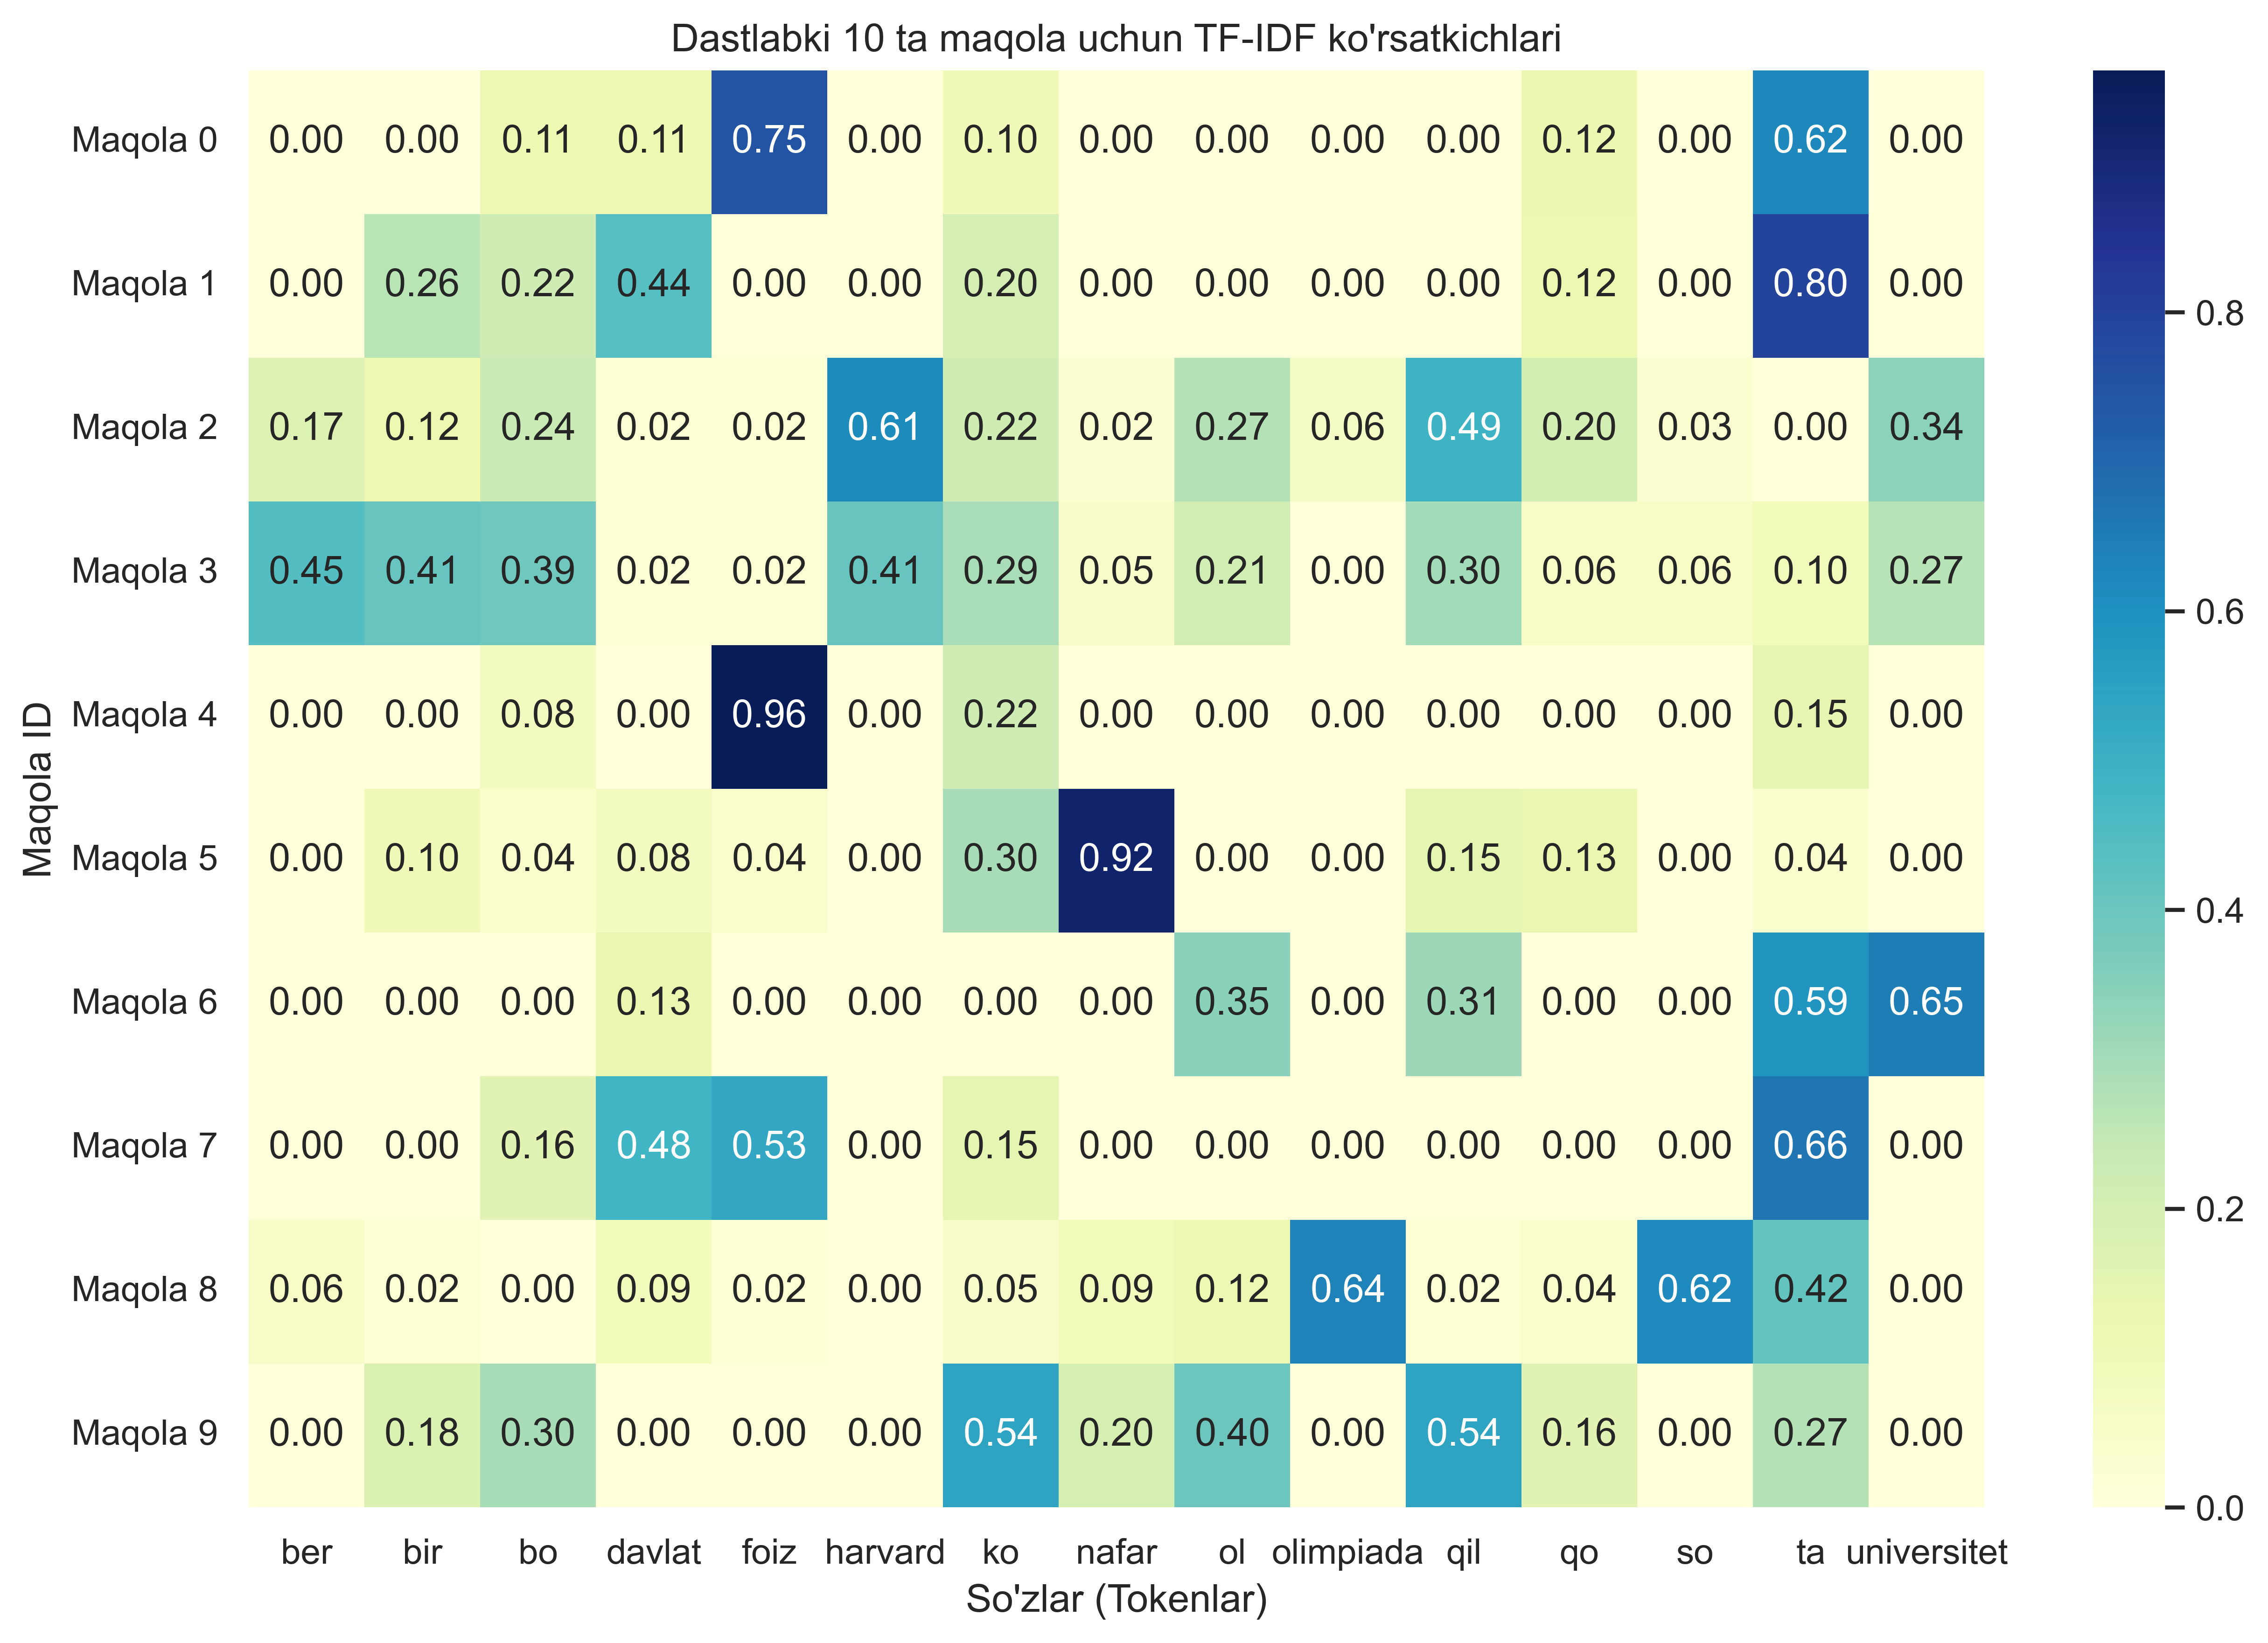

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Dastlabki 10 ta hujjat uchun TF-IDF hisoblash
tfidf = TfidfVectorizer(max_features=15)
X_tfidf = tfidf.fit_transform(df['clean_text'].iloc[:10])

# DataFramega o'tkazish (Grafik uchun qulay bo'lishi uchun)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df.index = [f"Maqola {i}" for i in range(10)]

# Heatmap chizish
plt.figure(figsize=(12, 8), dpi=500)
sns.heatmap(tfidf_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Dastlabki 10 ta maqola uchun TF-IDF ko'rsatkichlari")
plt.ylabel("Maqola ID")
plt.xlabel("So'zlar (Tokenlar)")
plt.show()

Ushbu notebookda biz xom ma'lumotlarni tozalash, ularni tahlilga tayyorlash va nihoyat mashina tushunadigan raqamli formatga (vektorlarga) o'tkazishni muvaffaqiyatli amalga oshirdik. Endi bu ma'lumotlar keyingi bosqichda (2-mavzu) klassifikatsiya modellari uchun tayyor.